# Exercise on panel data

## Whose Wages do Union Raise?

Our goal here, is to redo some of the analysis from:
    
F. Vella and M. Verbeek (1998), “Whose Wages Do Unions Raise? A Dynamic Model of Unionism and Wage Rate Determination for Young Men,” Journal of Applied Econometrics 13, 163-183.

__Import the dataset wage_panel from linearmodels.datasets. Describe it and make sure
it is in a format suitable for panel data analysis. Show graphically the decrease in unionization over the period.__

In [1]:
from linearmodels.datasets import wage_panel

In [7]:
df = wage_panel.load()

In [8]:
df

,nr,year,black,exper,hisp,hours,married,educ,union,lwage,expersq,occupation
0,13,1980,0,1,0,2672,0,14,0,1.197540,1,9
1,13,1981,0,2,0,2320,0,14,1,1.853060,4,9
2,13,1982,0,3,0,2940,0,14,0,1.344462,9,9
3,13,1983,0,4,0,2960,0,14,0,1.433213,16,9
4,13,1984,0,5,0,3071,0,14,0,1.568125,25,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4355,12548,1983,0,8,0,2080,1,9,0,1.591879,64,5
4356,12548,1984,0,9,0,2080,1,9,1,1.212543,81,5
4357,12548,1985,0,10,0,2080,1,9,0,1.765962,100,5
4358,12548,1986,0,11,0,2080,1,9,1,1.745894,121,5


Column `nr` corresponds to the individual number. Column `year` corresponds to observation date. 
We need two set these two columns as a hierarchical index (so that first index corresponds to `nr` and the second one
corresponds to `year`)

In [9]:
df.set_index(["nr", "year"], inplace=True)
df

black  exper  hisp  hours  married  educ  union     lwage  \
nr    year                                                              
13    1980      0      1     0   2672        0    14      0  1.197540   
      1981      0      2     0   2320        0    14      1  1.853060   
      1982      0      3     0   2940        0    14      0  1.344462   
      1983      0      4     0   2960        0    14      0  1.433213   
      1984      0      5     0   3071        0    14      0  1.568125   
...           ...    ...   ...    ...      ...   ...    ...       ...   
12548 1983      0      8     0   2080        1     9      0  1.591879   
      1984      0      9     0   2080        1     9      1  1.212543   
      1985      0     10     0   2080        1     9      0  1.765962   
      1986      0     11     0   2080        1     9      1  1.745894   
      1987      0     12     0   3380        1     9      1  1.466543   

            expersq  occupation  
nr    year                       
13    1980        1           9  
      1981        4           9  
      1982        9           9  
      1983       16           9  
      1984       25           5  
...             ...         ...  
12548 1983       64           5  
      1984       81           5  
      1985      100           5  
      1986      121           5  
      1987      144           5  

[4360 rows x 10 columns]

In [10]:
df.describe()

,black,exper,hisp,hours,married,educ,union,lwage,expersq,occupation
count,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000
mean,0.115596,6.514679,0.155963,2191.257339,0.438991,11.766972,0.244037,1.649147,50.424771,4.988532
std,0.319777,2.825873,0.362862,566.352301,0.496321,1.746181,0.429564,0.532609,40.781991,2.319978
min,0.000000,0.000000,0.000000,120.000000,0.000000,3.000000,0.000000,-3.579079,0.000000,1.000000
25%,0.000000,4.000000,0.000000,2040.000000,0.000000,11.000000,0.000000,1.350717,16.000000,4.000000
50%,0.000000,6.000000,0.000000,2080.000000,0.000000,12.000000,0.000000,1.671143,36.000000,5.000000
75%,0.000000,9.000000,0.000000,2414.250000,1.000000,12.000000,0.000000,1.991086,81.000000,6.000000
max,1.000000,18.000000,1.000000,4992.000000,1.000000,16.000000,1.000000,4.051860,324.000000,9.000000


In [13]:
# groupby syntax is very convenient here
df.groupby("year")['union'].sum() # number of unionized employees

year
1980    137
1981    136
1982    140
1983    134
1984    137
1985    122
1986    115
1987    143
Name: union, dtype: int64

In [15]:
N = df.groupby("year")['union'].count()

In [18]:
union_rate =  df.groupby("year")['union'].sum() / N
union_rate

year
1980    0.251376
1981    0.249541
1982    0.256881
1983    0.245872
1984    0.251376
1985    0.223853
1986    0.211009
1987    0.262385
Name: union, dtype: float64

Let's plot decline over time of unionization rate

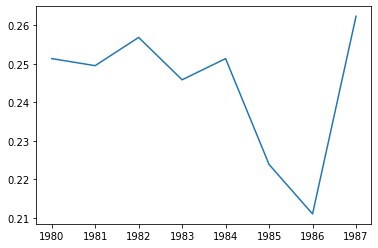

In [20]:
from matplotlib import pyplot as plt
plt.plot(union_rate.index, union_rate)

__Our goal is to estimate the wage premium (if any) associated to belonging to a union.__

We first consider a model $y_{i,t} = \alpha + X_{i,t} \beta + \epsilon_{i,t}$ where $y_{i,t}$ is the wage and $X_{i,t}$ contains a vector of regressors which can explain it.

Estimate this model using OLS. What is the effect of union. What is the problem of this regression? Should we use individual or time fixed effects?

In [21]:
import linearmodels

In [22]:
from linearmodels import PanelOLS

mod = PanelOLS.from_formula(
    "lwage ~ black + hisp + exper + hours + married + educ + union + expersq + occupation",
    data=df
)
mod.fit()

Dep. Variable:,lwage,R-squared:,0.9250
Estimator:,PanelOLS,R-squared (Between):,0.9592
No. Observations:,4360,R-squared (Within):,0.1763
Date:,"Tue, Mar 15 2022",R-squared (Overall):,0.9250
Time:,11:45:22,Log-likelihood,-2938.0
Cov. Estimator:,Unadjusted,,
,,F-statistic:,5960.1
Entities:,545,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(9,4351)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,5960.1


The regression is significant: R2 is significantly different from zero (p-value< 1e-5). All coefficients are significant at the 5% level, including the coefficient in front of `lwage` (log of wages).

According to this coefficient, belonging to a union in a given year, includes salary by 20% approximately. (log(1+0.2)~18%)

__Formulate a model with individual fixed effect. Run a panel regression. Comment the results.__

In this regression, non-observed heterogeneity between individuals, might explain difference in wage levels, and lead to systematic biases in the estimated coefficient.
To control for it, we can add individual fixed effects.


In [23]:
from linearmodels import PanelOLS

mod = PanelOLS.from_formula(
    "lwage ~ black + hisp + exper + hours + married + educ + union + expersq + occupation + EntityEffects",
    data=df)
print(mod.fit())

AbsorbingEffectError: 
The model cannot be estimated. The included effects have fully absorbed
one or more of the variables. This occurs when one or more of the dependent
variable is perfectly explained using the effects included in the model.

The following variables or variable combinations have been fully absorbed
or have become perfectly collinear after effects are removed:

          black
          hisp
          married, educ

Set drop_absorbed=True to automatically drop absorbed variables.


We observe that the fixed effects are "absorbing" some indicator variables (black, hisp, married, educ). For conistency, we have to remove
them from the regression.

In [24]:
mod = PanelOLS.from_formula("lwage ~ black + hisp + exper + hours + married + educ + union + expersq + occupation + EntityEffects", data=df, drop_absorbed=True)


In [25]:
mod.fit()

/home/pablo/.local/opt/miniconda/lib/python3.8/site-packages/linearmodels/panel/model.py:1743: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

black, hisp, educ

  warnings.warn(


Dep. Variable:,lwage,R-squared:,0.2005
Estimator:,PanelOLS,R-squared (Between):,0.3244
No. Observations:,4360,R-squared (Within):,0.2005
Date:,"Tue, Mar 15 2022",R-squared (Overall):,0.3190
Time:,11:52:33,Log-likelihood,-1271.2
Cov. Estimator:,Unadjusted,,
,,F-statistic:,159.19
Entities:,545,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(6,3809)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,159.19


We observe that the variables in this regression have a worse predictive power than the former one. This is not a surprise: we have replaced many observed characteristics
by fixed effect that are fitted to every single individual. For predictions there is no way to guess the fixed effect, which is why the R2 is low.
Note that the effect of belonging to a union, is reduced by half (8% increase in salary explained by unionization), which points to an important effect of unobserved heterogeneity.

__Formulate a model with individual and time fixed effect. Run a panel regression. Comment the results.__

In the same spirit, the time trend, is not accounted for in the regression, which might explain some of the results.
Let's add time fixed effects.

In [26]:
mod = PanelOLS.from_formula(
    "lwage ~ black + hisp + exper + hours + married + educ + union + expersq + occupation \
    + EntityEffects + TimeEffects", data=df, drop_absorbed=True)


In [27]:
mod.fit()

/home/pablo/.local/opt/miniconda/lib/python3.8/site-packages/linearmodels/panel/model.py:1743: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

black, hisp, exper, educ

  warnings.warn(


Dep. Variable:,lwage,R-squared:,0.0487
Estimator:,PanelOLS,R-squared (Between):,-0.8389
No. Observations:,4360,R-squared (Within):,-0.6698
Date:,"Tue, Mar 15 2022",R-squared (Overall):,-0.8315
Time:,11:55:45,Log-likelihood,-1263.6
Cov. Estimator:,Unadjusted,,
,,F-statistic:,38.919
Entities:,545,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(5,3803)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,38.919


Here the addition of time fixed effects, reduces the explanatory power a bit further, but does not change much the estimate for the effect of unionization (still around 8%).